In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib widget
%matplotlib inline
%matplotlib nbagg
%matplotlib tk

In [2]:
students=pd.read_csv("C:/Users/rafae/OneDrive/Escritorio/Badededatosexcel/StudentsPerformance.csv")

### Este dataset contiene los datos de 1000 alumnos elegidos al azar con algunas caracteristicas el objetivo de este projecto es mostrar algunas tecnicas de Feature engineering antes de aplicar Machine learning.
### Este dataset es muy simple la mayor parte de los datos son de tipo binario por lo cual no da tantas opciones de aplicar otro tipo de tecicas pero si nos da una vision acerca de como ocupar un dataset que no te da variables tan diferentes.

In [3]:
students.shape

(1000, 8)

In [4]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### gender : Contiene el género male/female
### race/ethnicity  : Contiene el tipo de grupo
### parental level of education   : Grado escolar
### lunch   : Tipo de lunch                       
### test preparation course  : Tomó un curso de preparación yes/not
### math score      :  Calificación en matemáticas
### reading score     :Calificación en lectura
### writing score : Calificación en escritura


In [5]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
students.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
students.rename(columns={"parental level of education":"parental_level_of_education","test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score","writing score":"writing_score"} ,inplace=True)

### Por facilidad al usar el código cambie el tipo de tipografía.
### snake_case
### La nomenclatura “serpiente” es definida de esta forma porque siempre la usamos sobre el piso, esto quiere decir que las letras siempre las minúsculas y las diferentes palabras que compongan el nombre o la definición que se desea dar están separadas por un guión bajo de esta forma: mi_nombre_es.


# Análisis de dataset.

### Crear una nueva columna que contenga el promedio sumado de las calificaciones.



In [8]:
average=(students["math_score"]+students["reading_score"]+students["writing_score"])/3
students["average_test_score"]=average.round(0)       

### Nueva columna que contenga  si el promedio es aprobatorio o reprobatorio (mayor a 60).

In [9]:
def pass_fail(df):
    if df['average_test_score']>=60:
        val ="pass"
    else:
         
        val = "fail"
    return val

In [10]:
students["student_approved"]=students.apply(pass_fail, axis=1)

### Crear una columna de calificaciones de acuerdo al sistema de Estados Unidos.

In [11]:
#notas
def notes(df):
    if df["average_test_score"]>=90:
        val="A"
    elif df["average_test_score"] >= 80 and df["average_test_score"] <= 89 :
        val="B"
    elif df["average_test_score"] >= 70 and df["average_test_score"] <= 79:
        val="C"
    elif df["average_test_score"]>=60 and df["average_test_score"]<= 69:
        val="D"
    else:
        val="F"
    return val    

In [12]:
students["notes"]=students.apply(notes,axis=1)

In [13]:
students.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_test_score,student_approved,notes
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,pass,C
1,female,group C,some college,standard,completed,69,90,88,82.0,pass,B
2,female,group B,master's degree,standard,none,90,95,93,93.0,pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,fail,F
4,male,group C,some college,standard,none,76,78,75,76.0,pass,C


## Análisis de gráficas.

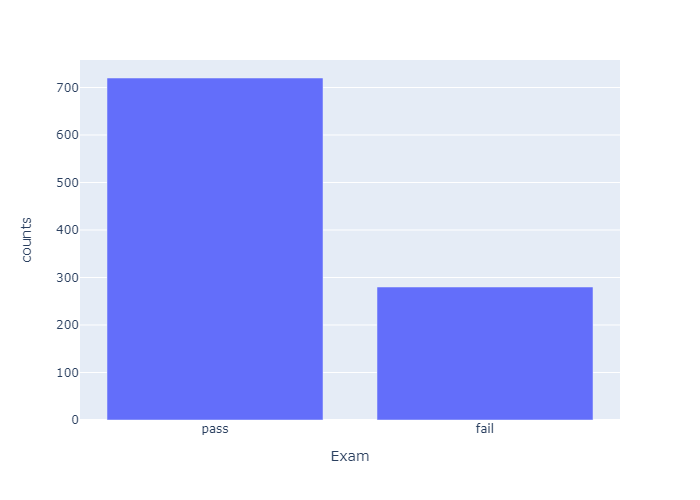

In [14]:
df=students["student_approved"].value_counts().reset_index()
fig = px.bar(df, y='student_approved',x="index",labels={"student_approved":"counts","index":"Exam"})
fig.show("png")

### En este gráfico se compara el valor del promedio de cada estudiante para saber el numero de cuantos aprobaron y cuántos reprobaron viendo claramente que la mayoría aprobó en el promedio.

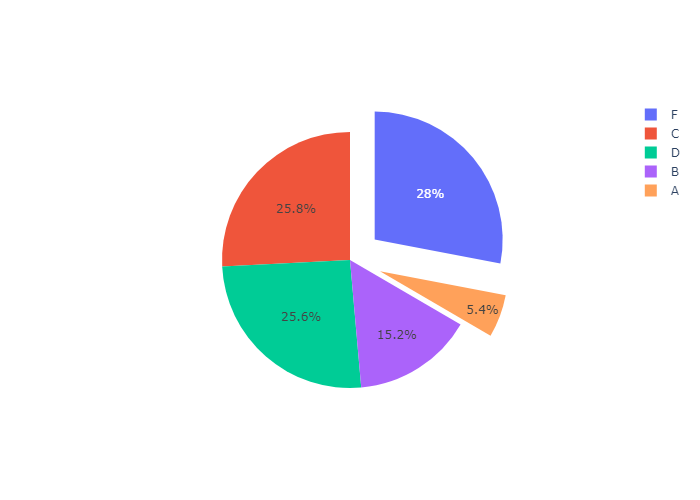

In [15]:
df=students["notes"].value_counts().reset_index()
df=df.sort_values(by="index",ascending=True)

fig = go.Figure(data=[go.Pie(labels=df["index"], values=df["notes"], pull=[0.25,0, 0, 0, 0.25])])
fig.show("png")

### En el sistema de estados unidos la calificación reprobatoria es de F y la aprobatoria es de A .En la gráfica de pastel podemos observar que solo el 4.5% obtuvo el valor de A mientras que la mayoría obtuvo el valor de F aunque en un enfoque mas numérico podemos saber que el valor de f va de 0-60 mientras que el valor de A va de 90-100.

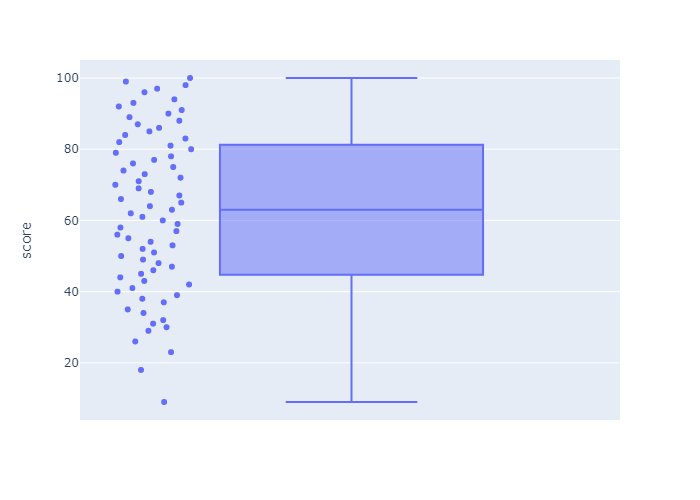

In [16]:
df=students["average_test_score"].value_counts().reset_index()
fig=px.box(df,y="index",points="all",labels={"index":"score"})
fig.show("png")

### En box plot podemos observar una distribución de números continuos en el cual nos da otra idea de la columna de porcentaje ,vemos que la mayoría de calificaciones se centra entre  44-81  siendo la media de 63 osea que la mayoría de personas sacaron un promedio cercano a estos valores.El dato más atípico es 9.

In [17]:
df=students["average_test_score"].value_counts().reset_index()
df.rename({"index":"Average","average_test_score":"counts"})
df.head(3)

,index,average_test_score
0,68.0,35
1,69.0,34
2,73.0,33


### En esta tabla podemos ver que la media es de 68 y los valores que le siguen de cerca son 69 y 73 ,que son los valores que más se repiten en el promedio general.

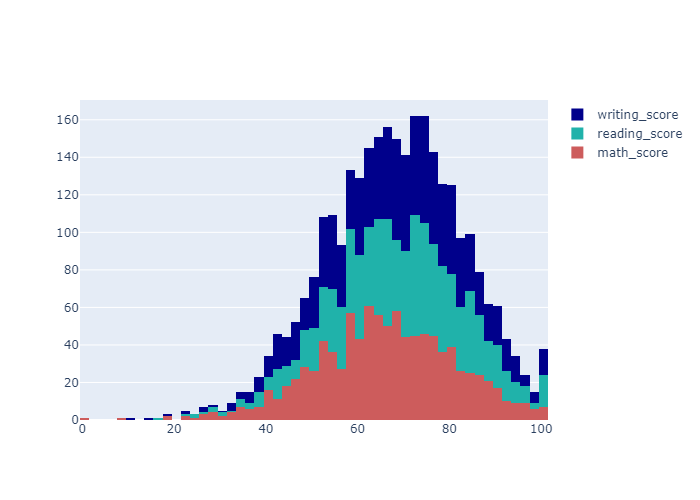

In [18]:
x0 = students["math_score"]
x1 = students["reading_score"]
x2 = students["writing_score"]

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,name="math_score",marker_color = "indianred"))
fig.add_trace(go.Histogram(x=x1,name="reading_score",marker_color = 'lightseagreen'))
fig.add_trace(go.Histogram(x=x2,name="writing_score",marker_color = 'darkblue'))


fig.update_layout(barmode='stack') 
fig.show("png")

### Con este histograma podemos notar que la mayoría de las calificaciones más altas están en el examen de escritura mientras que las más bajas se dan en matemáticas.

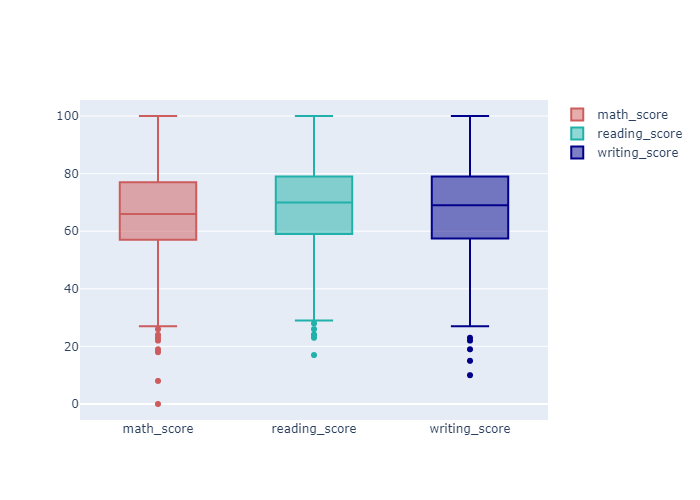

In [19]:
y0 = students["math_score"]
y1 = students["reading_score"]
y2= students["writing_score"]

fig = go.Figure()
fig.add_trace(go.Box(y=y0, name='math_score',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=y1, name = 'reading_score',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=y2, name = 'writing_score',
                marker_color = 'darkblue'))

fig.show("png")

### Comparación de valor de calificación de cada examen con los datos atípicos,los valores más atípicos están en matemáticas mientras que los datos menos atípicos los tiene el examen de lectura,podemos comparar sus medias de en matemáticas 66 en lectura 70 y en escritura 69.

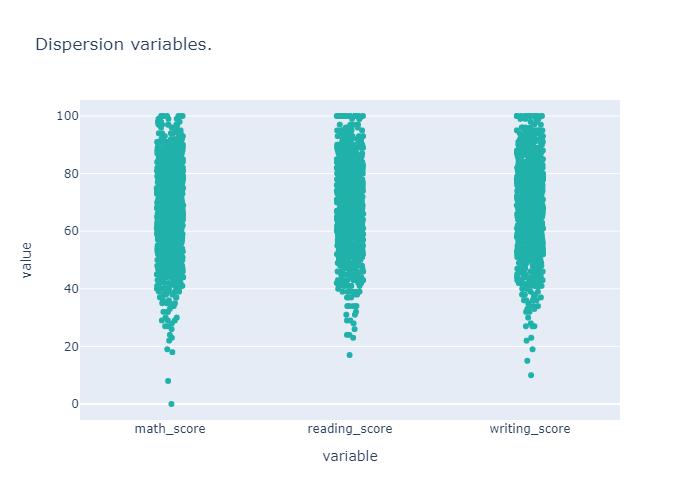

In [20]:
df = students
x_data=["math_score","reading_score","writing_score"]
fig = px.strip(df,  y=x_data,title="Dispersion variables.",color_discrete_sequence=["lightseagreen"])
fig.show("png")

### Podemos observar claramente la dispersión en cada variable.

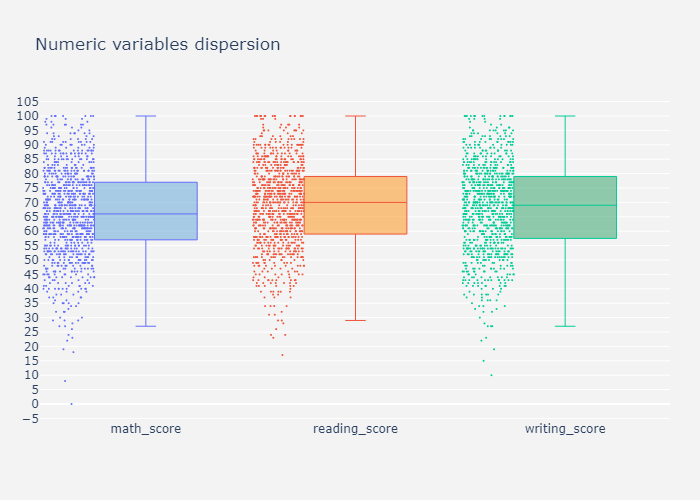

In [21]:
x_data = ["math_score","reading_score","writing_score" ]

N = 50

y0 = students["math_score"]
y1 = students["reading_score"]
y2= students["writing_score"]

y_data = [y0, y1, y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
    title='Numeric variables dispersion',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show("png")

### Un boxplot con la dispersión de los 1000 datos.

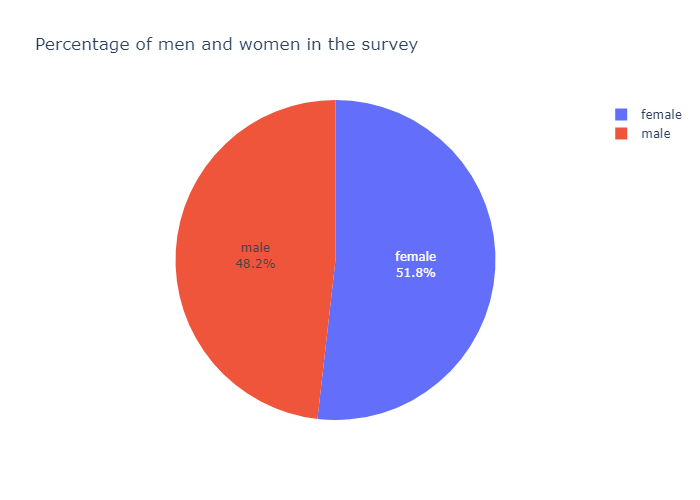

In [22]:
sex=students["gender"].value_counts().reset_index()
sex=pd.DataFrame(sex)
df = sex
fig = px.pie(df, values='gender', names='index',
             title='Percentage of men and women in the survey',
             hover_data=['index'], labels={"gender":"count","index":"sex"})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show("png")

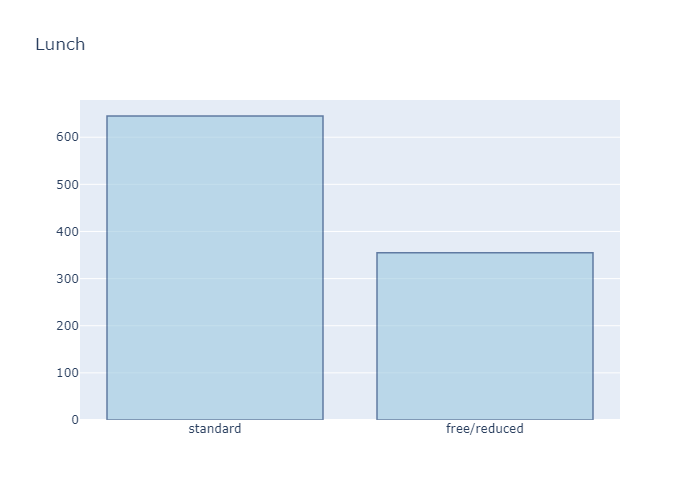

In [23]:
lunch=students["lunch"].value_counts().reset_index()
lunch=pd.DataFrame(lunch)
fig = go.Figure(data=[go.Bar(x=lunch["index"], y=lunch["lunch"]
            )])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Lunch')
fig.show("png")

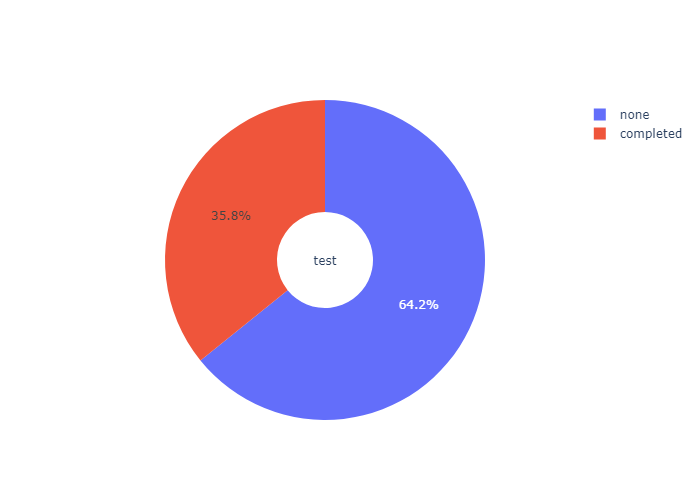

In [24]:
tpc=students["test_preparation_course"].value_counts().reset_index()
tpc=pd.DataFrame(tpc)
fig = go.Figure(data=[go.Pie(labels=tpc["index"], values=tpc["test_preparation_course"], hole=.3,title="test")])
fig.show("png")

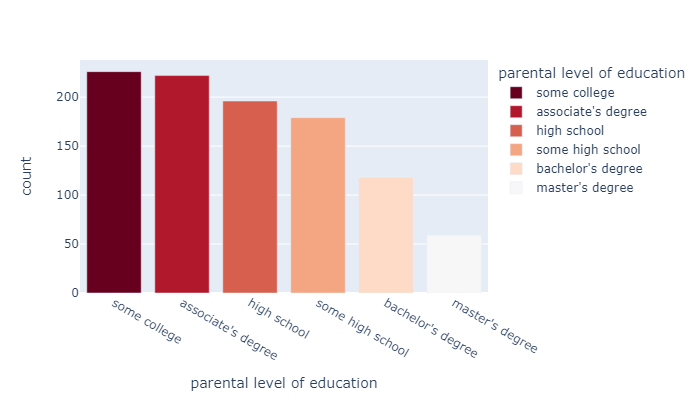

In [25]:
df = students["parental_level_of_education"].value_counts().reset_index()
fig = px.bar(df, x='index', y='parental_level_of_education',
              color='index',labels={"parental_level_of_education":"count","index":"parental level of education"},
            height=400, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show("png")

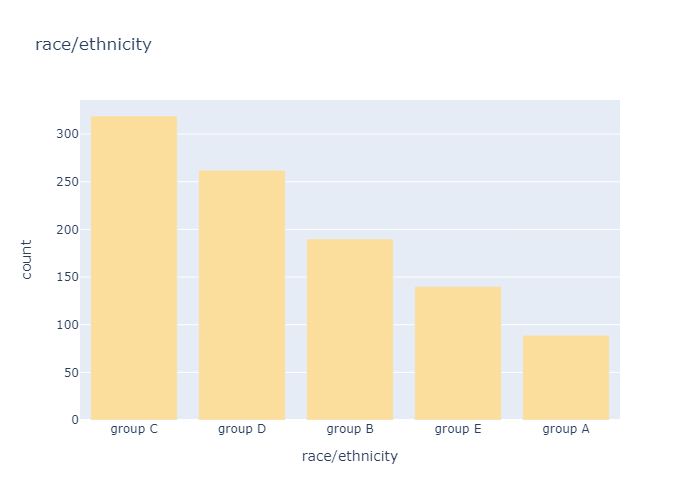

In [26]:
df = students["race/ethnicity"].value_counts().reset_index()
fig = px.bar(df, x='index', y='race/ethnicity', title='race/ethnicity'
             ,labels={"race/ethnicity":"count","index":"race/ethnicity"},color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.show("png")

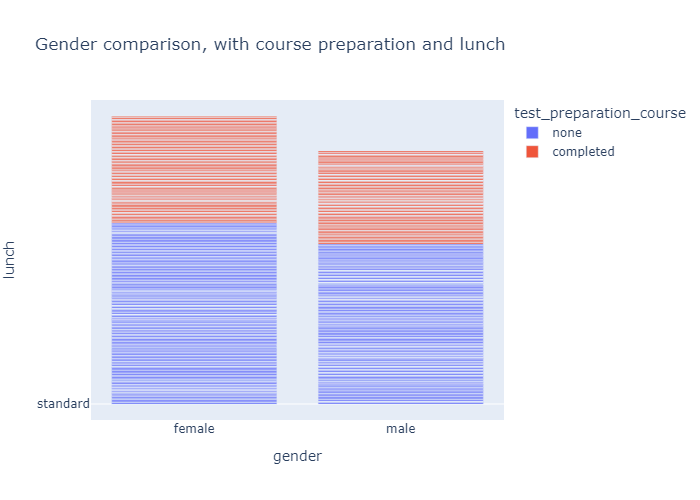

In [27]:
df = students
fig = px.bar(df, x="gender", y="lunch", color="test_preparation_course", title="Gender comparison, with course preparation and lunch")
fig.show("png")

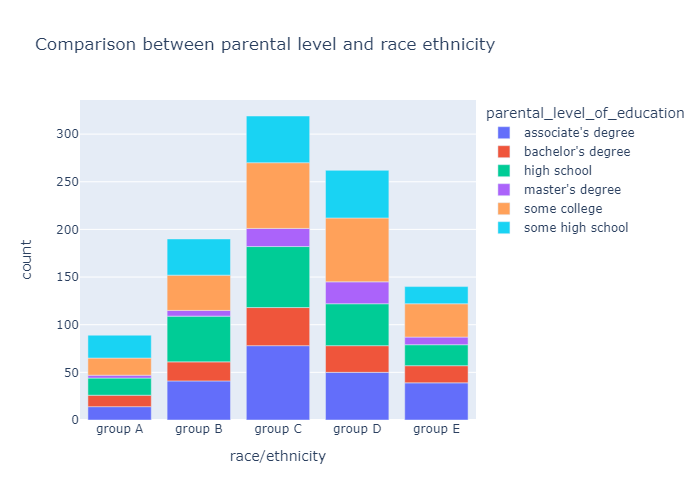

In [28]:
long_df = pd.DataFrame(students.groupby(["race/ethnicity","parental_level_of_education"]).size().reset_index(name="count"))
fig = px.bar(long_df, x="race/ethnicity", y="count", color="parental_level_of_education", title="Comparison between parental level and race ethnicity")
fig.show("png")

In [29]:
students_categoric=pd.DataFrame(students)

### Creó un nuevo DataFrame que contenga valores numéricos en vez de categóricos.
 


In [30]:
new_race={"group A": 1,
         "group B":2,
         "group C":3,
         "group D":4,
         "group E":5
        }
new_parental_level={"some high school":1,
                    "high school":2,
                    "some college":3,
                    "associate's degree":4,
                    "bachelor's degree":5,
                    "master's degree":6
                    
}
new_notes={"A":1,
           "B":2,
           "C":3,
           "D":4,
           "F":5           
}


In [31]:
gender_binary={"female":1,"male":0}
lunch_binary={"standard":1,"free/reduced":0}
test_binary={"none":1,"completed":0}
approved_categoric={"pass":1,"fail":0}

In [32]:
students_categoric["race_categoric"]=students_categoric["race/ethnicity"].replace(new_race)
students_categoric["parental_level_categoric"]=students_categoric["parental_level_of_education"].replace(new_parental_level)
students_categoric["notes_categoric"]=students_categoric["notes"].replace(new_notes)

students_categoric["gender_binary"]=students_categoric["gender"].replace(gender_binary)
students_categoric["lunch_binary"]=students_categoric["lunch"].replace(lunch_binary)
students_categoric["test_binary"]=students_categoric["test_preparation_course"].replace(test_binary)
students_categoric["students_approved_binary"]=students_categoric["student_approved"].replace(approved_categoric)


In [33]:
students_categoric.drop(labels=['gender', 'race/ethnicity', 'parental_level_of_education',"lunch","test_preparation_course","notes","student_approved"], axis=1, inplace=True)

In [34]:
students_categoric.head(5)

,math_score,reading_score,writing_score,average_test_score,race_categoric,parental_level_categoric,notes_categoric,gender_binary,lunch_binary,test_binary,students_approved_binary
0,72,72,74,73.0,2,5,3,1,1,1,1
1,69,90,88,82.0,3,3,2,1,1,0,1
2,90,95,93,93.0,2,6,1,1,1,1,1
3,47,57,44,49.0,1,4,5,0,0,1,0
4,76,78,75,76.0,3,3,3,0,1,1,1


# Feature engineering

In [35]:
students2=students_categoric.copy()

## Mutual information scores

### Dependiendo de la columna que se quiere predecir se compara con las demás columnas para buscar qué tanto coinciden,pero antes se tiene que hacer que todos los datos sean numéricos.

In [36]:
students2.drop(labels=["average_test_score","notes_categoric","math_score","reading_score","writing_score"],axis=1,inplace=True)

In [37]:
X=students2.copy()
y=X.pop("students_approved_binary")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int    

In [38]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

lunch_binary                0.056660
gender_binary               0.033668
parental_level_categoric    0.022938
test_binary                 0.011545
race_categoric              0.002485
Name: MI Scores, dtype: float64

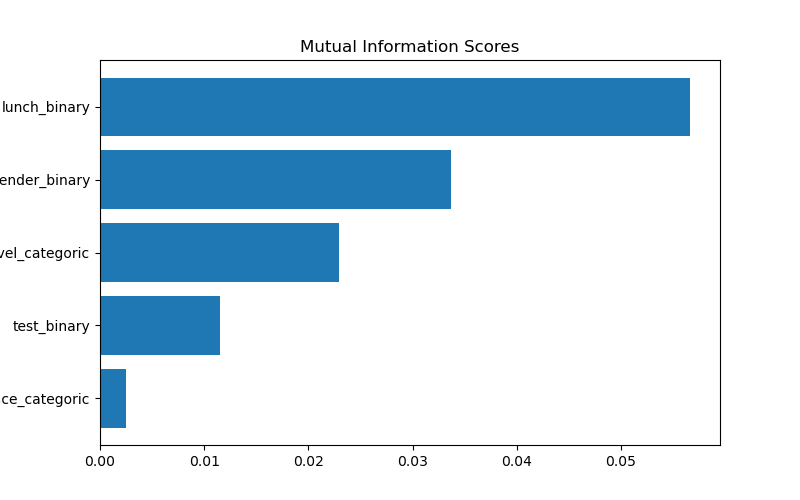

In [39]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### En esta gráfica se muestra que columna es más importante para la predicción.



### En las siguientes graficas se muestra si hay una correlacion entre dos variables.

In [40]:
import seaborn as sns

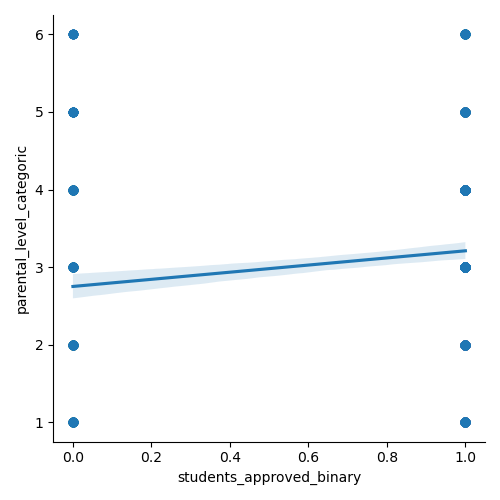

In [42]:
sns.lmplot(x="students_approved_binary", y="parental_level_categoric", data=students2);

### Comparación de las variables usando cluster k-means.

In [43]:
from sklearn.cluster import KMeans

In [44]:
X=students2
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,race_categoric,parental_level_categoric,gender_binary,lunch_binary,test_binary,students_approved_binary,Cluster
0,2,5,1,1,1,1,2
1,3,3,1,1,0,1,4
2,2,6,1,1,1,1,2
3,1,4,0,0,1,0,2
4,3,3,0,1,1,1,4


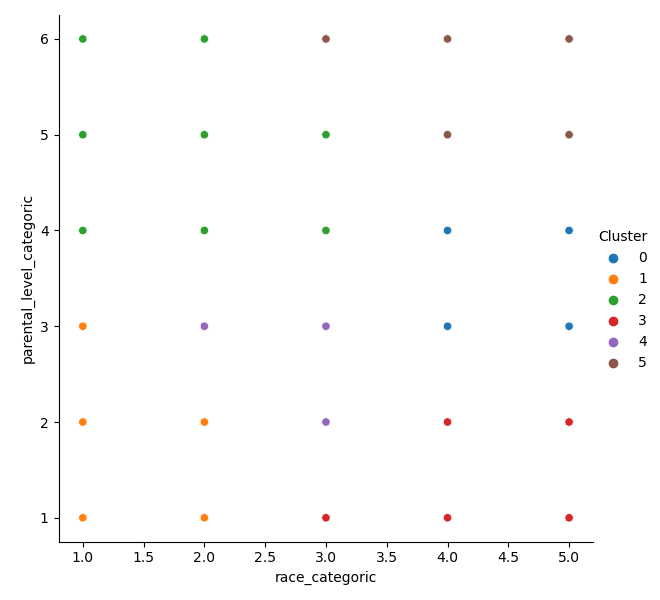

In [45]:
sns.relplot(
    x="race_categoric", y="parental_level_categoric", hue="Cluster", data=X, height=6,
);

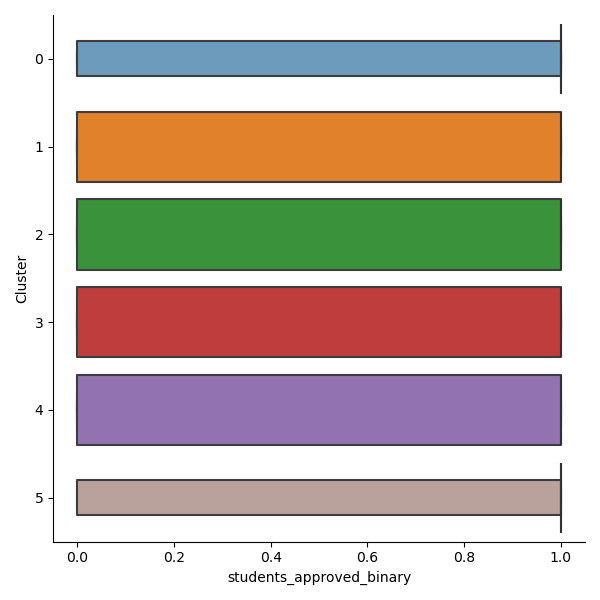

In [46]:
X["students_approved_binary"] = students2["students_approved_binary"]
sns.catplot(x="students_approved_binary", y="Cluster", data=X, kind="boxen", height=6);

In [47]:
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

In [48]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [49]:
features = ["race_categoric","parental_level_categoric","gender_binary","lunch_binary","test_binary"]

X = students2.copy()
y = X.pop('students_approved_binary')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [50]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()


,PC1,PC2,PC3,PC4,PC5
0,0.531704,0.522782,-1.326938,-0.513234,1.487414
1,0.232108,0.074300,0.775638,-1.568679,0.418135
2,1.004288,0.653634,-1.356851,-0.312357,1.920095
3,-1.229464,1.162460,-0.389758,1.740285,1.152365
4,-0.391396,-1.109270,-0.573536,0.607039,0.353698


In [51]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
race_categoric,0.663620,-0.337305,0.141950,0.075517,-0.648059
parental_level_categoric,0.690130,0.191087,-0.043683,0.293349,0.631858
gender_binary,0.275666,0.539349,-0.285412,-0.728277,-0.145818
lunch_binary,0.078367,-0.745849,-0.219761,-0.508860,0.361019
test_binary,-0.034579,-0.050225,-0.920971,0.344845,-0.170812


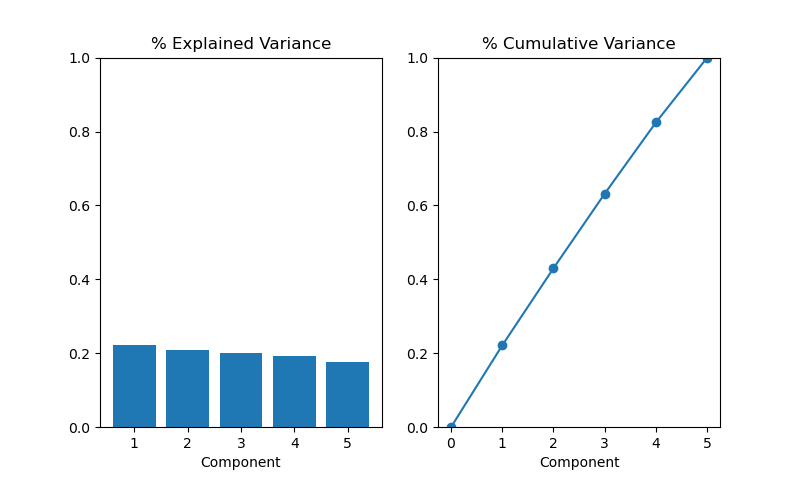

In [52]:
plot_variance(pca);

In [53]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC3    0.066674
PC2    0.063569
PC1    0.047654
PC4    0.045987
PC5    0.037105
Name: MI Scores, dtype: float64

In [54]:
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["race_categoric","parental_level_categoric","gender_binary","lunch_binary","test_binary"]
df.loc[idx, cols]

,race_categoric,parental_level_categoric,gender_binary,lunch_binary,test_binary
545,5,1,0,0,0
390,5,1,0,0,0
419,5,2,0,0,0
990,5,2,0,0,0
132,5,3,0,0,0
...,...,...,...,...,...
614,1,4,1,1,1
697,1,5,1,1,1
816,1,5,1,1,1
129,1,5,1,1,1


In [55]:
students2["ad"] = X["race_categoric"] / X["parental_level_categoric"]# esto n va asi pero lo modifique
sns.regplot(x="ad", y='students_approved_binary', data=students2, order=2);

In [56]:
import warnings

In [57]:
warnings.filterwarnings('ignore')


In [58]:
students.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_test_score,student_approved,notes,race_categoric,parental_level_categoric,notes_categoric,gender_binary,lunch_binary,test_binary,students_approved_binary
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,pass,C,2,5,3,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,82.0,pass,B,3,3,2,1,1,0,1
2,female,group B,master's degree,standard,none,90,95,93,93.0,pass,A,2,6,1,1,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,fail,F,1,4,5,0,0,1,0
4,male,group C,some college,standard,none,76,78,75,76.0,pass,C,3,3,3,0,1,1,1


In [59]:
X = students.copy()
y = X.pop('students_approved_binary')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [60]:
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(cols=["lunch"], m=5.0)

encoder.fit(X_encode, y_encode)

X_train = encoder.transform(X_pretrain)

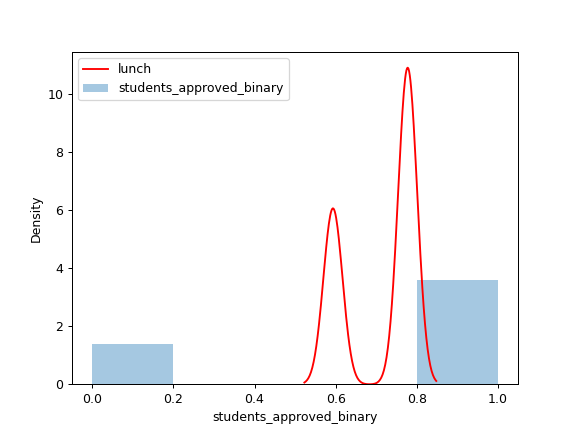

In [61]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.lunch, color='r', ax=ax)
ax.set_xlabel("students_approved_binary")
ax.legend(labels=['lunch', 'students_approved_binary']);